In [4]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

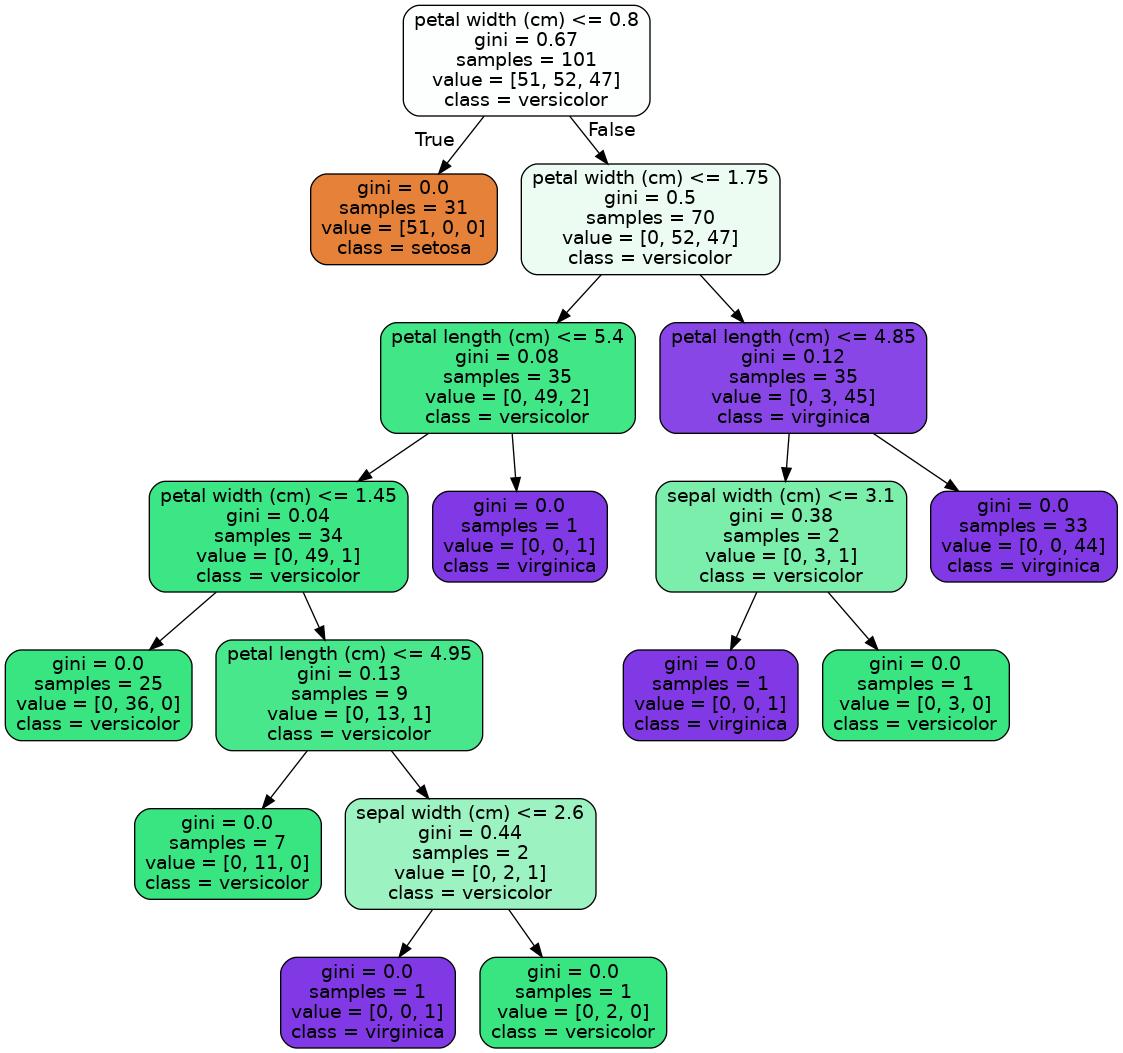

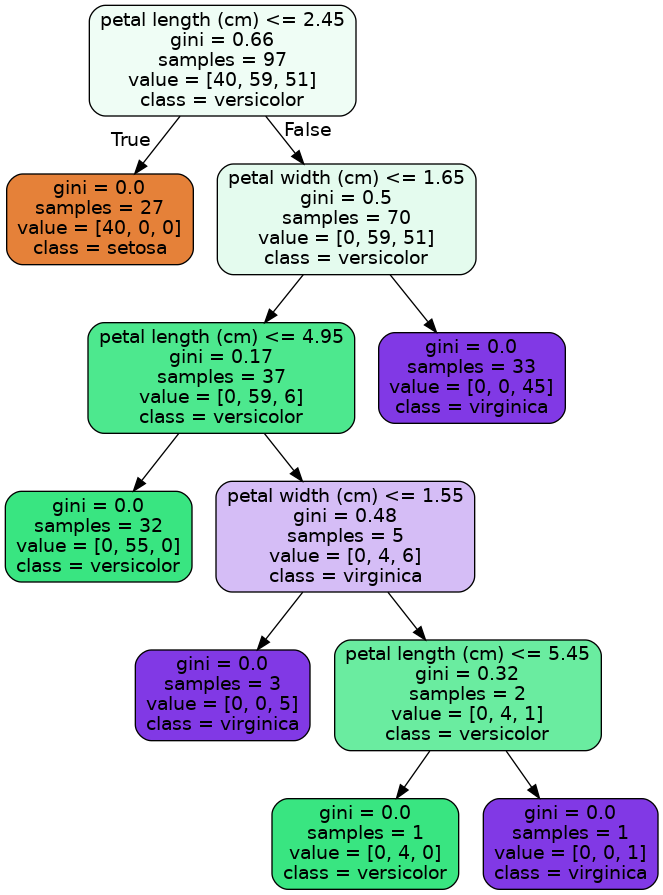

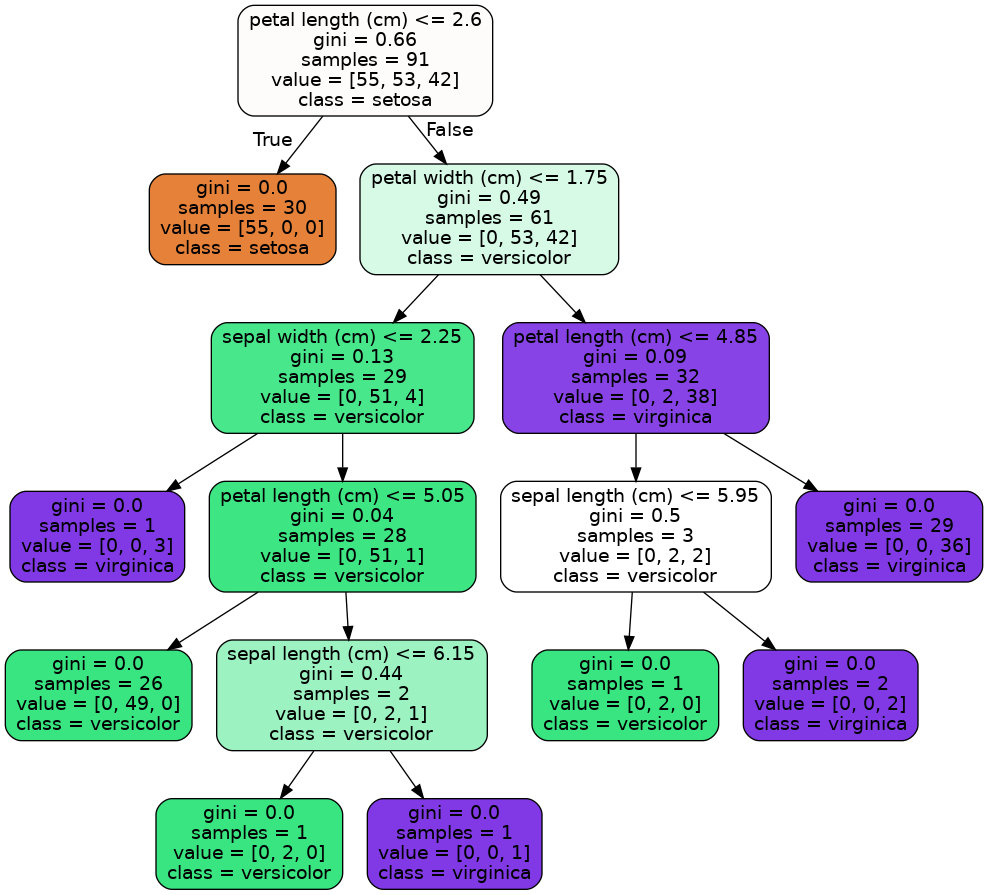

In [5]:
# Load iris dataset
iris = load_iris()

# Create a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Create a Random Forest classifier with 3 trees
rf = RandomForestClassifier(n_estimators=3, random_state=42)

# Fit the model
rf.fit(df[iris.feature_names], df['target'])

# Extract the individual trees
trees = rf.estimators_

# Plot the individual trees
for i in range(len(trees)):
    export_graphviz(trees[i], out_file=f'tree_{i}.dot', feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, proportion=False, precision=2, filled=True)
    
    # Convert .dot file to .png
    (graph,) = pydot.graph_from_dot_file(f'tree_{i}.dot')
    display(Image(graph.create_png()))
